# Daten einlesen und Datenakquisition

Daten kann man nur analysieren, wenn man sie zur Verfügung hat. Daher beschäftigen wir uns zunächst mit dem Einlesen existierender Daten und der Datenakquisition, also dem Herunterladen von Daten. Dazu musst du herausfinden, wo du interessante Daten finden kannst oder sie evtl. im eigenen Unternehmen sogar schon hast.

## Daten einlesen

Beim Einlesen von Daten wirst du feststellen, dass es sehr viele unterschiedliche Format gibt. Zum Glück kann `pandas` mit den meisten sehr gut umgehen.

Betrachten wir zunächst [CSV-Dateien](https://de.wikipedia.org/wiki/CSV_(Dateiformat), das steht für *comma separated values* - es handelt sich dabei um ein Format mit einer festen Spaltenstruktur.

`pandas` hat eine Funktion `read_csv`, mit der sich solche Daten gut einlesen lassen:

In [ ]:
import sys, os
ON_COLAB = 'google.colab' in sys.modules

if ON_COLAB:
    os.system("test -f stundenplan.csv || wget  https://github.com/heiseacademy/ml-python/blob/main/02-ml-intro/stundenplan.csv")
    os.system("test -f stundenplan.json || wget  https://github.com/heiseacademy/ml-python/blob/main/02-ml-intro/stundenplan.json")
    os.system("test -f stundenplan.xlsx || wget  https://github.com/heiseacademy/ml-python/blob/main/02-ml-intro/stundenplan.xlsx")
    os.system("test -f stundenplan.db || wget  https://github.com/heiseacademy/ml-python/blob/main/02-ml-intro/stundenplan.db")

In [ ]:
import pandas as pd
pd.read_csv("stundenplan.csv")

Es gibt noch einige Optionen, z.B. ob Spaltenköpfe vorhanden sind, wie mit dem Index umgegangen werden soll und welche Felder `pandas` als Zeitstempel interpretieren soll.

Neben CSV spielt [JSON](https://de.wikipedia.org/wiki/JavaScript_Object_Notation) ein zunehmend wichtigere Rolle und hat eigentlich XML als Datenformat verdrängt. Ursprünglich wurden JSON nur in Javascript verwendet, ist aber zwischenzeitlich absolut universell einsetzbar. Das liegt auch an der flexiblen Struktur, im Gegensatz zu CSV müssen dabei keine Spalten vorgegeben werden.

```json
[
  {
    "Stunde": 1,
    "Montag": "Mathematik",
    "Dienstag": "Deutsch",
    "Mittwoch": "Englisch",
    "Donnerstag": "Erdkunde",
    "Freitag": "Politik"
  },
  {
    "Stunde": 2,
    "Montag": "Sport",
    "Dienstag": "Deutsch",
    "Mittwoch": "Englisch",
    "Donnerstag": "Sport",
    "Freitag": "Geschichte"
  },
  {
    "Stunde": 3,
    "Montag": "Sport",
    "Dienstag": "Religion (ev., kath.)",
    "Mittwoch": "Kunst",
    "Donnerstag": null,
    "Freitag": "Kunst"
  }
]
```

`pandas` kann mit `read_json` solche Daten direkt einlesen, abhängig von der Form der Daten kannst du unterschiedliche Optionen verwenden, damit der entstehende `DataFrame` auch das richtige Format hat.

In [ ]:
pd.read_json("stundenplan.json")

Viele Unternehmensdaten liegen als [Excel-Tabellen](https://de.wikipedia.org/wiki/Microsoft_Excel) vor. 

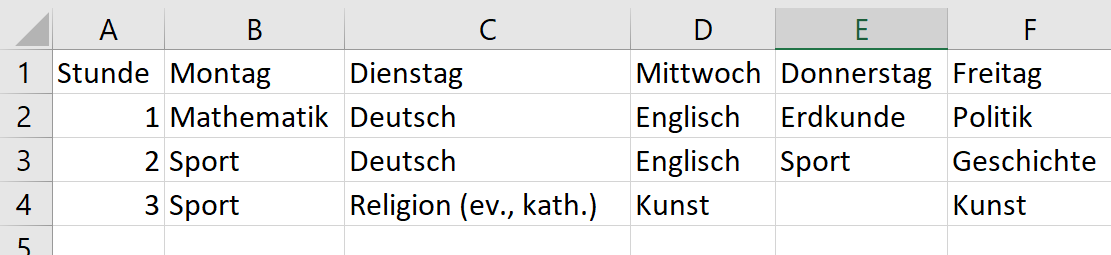

Auch damit kann `pandas` sehr gut umgehen und diese direkt einlesen:

In [ ]:
pd.read_excel("stundenplan.xlsx")

Wenn du auf größere Datenbestände zugreifen möchtest, findest du diese oft in [relationalen Datenbanken](https://de.wikipedia.org/wiki/Relationale_Datenbank). Auch hier kann dich `pandas` optimal unterstützen und die [SQL](https://de.wikipedia.org/wiki/SQL)-Anfragen direkt in Tabellen wandeln.

In [ ]:
import sqlite3
sql = sqlite3.connect("stundenplan.db")
pd.read_sql("SELECT * FROM stundenplan", sql)

Geht es um noch größere Datenbestände, musst du z.B. auf [Hadoop](https://de.wikipedia.org/wiki/Apache_Hadoop) oder [Spark](https://de.wikipedia.org/wiki/Apache_Spark) zugreifen. Auch dafür gibt es Anbindungen, die du in Python und `pandas` integrieren kannst. So kann `pandas` z.B. direkte [Parquet](https://en.wikipedia.org/wiki/Apache_Parquet)-Files auslesen.

## Datenakquisition

Wenn du Daten selbst herunterladen musst, musst du zunächst die richtigen Daten finden. Wie das geht, ist sehr von deinem konkreten Anwendungsfall abhängig, Suchmaschinen helfen dir dabei fast immer. So gibt es z.B. von Google eine spezielle Seite, mit der du [Datensets suchen kannst](https://datasetsearch.research.google.com/).

Wenn du vorhandene Datensets gefunden hast, kannst du die natürlich direkt nutzen. Oftmals werden die Datensets auch über ein API bereitgestellt. Als Beispiel betrachten wir hier [Eurostat](https://ec.europa.eu/eurostat), die europäische Statistikbehören. Diese stellt die Daten in unterschiedlichen Formaten zu Verfügung und es gibt auch zusätzlich ein [Python-Paket](https://pypi.org/project/eurostat/), das diese direkt auslesen kann:

In [ ]:
!pip install eurostat

Alle Statistikdaten haben bei Eurostat ein Kürzel. Dieses Beispiel zeigt *Konsumindikatoren*, diese tragen das Kürzel `ei_bsco_m`. Es handelt sich dabei um sog. *business and consumer surveys*, eine genauere Erklärung findest du [hier](https://ec.europa.eu/eurostat/cache/metadata/en/ei_bcs_esms.htm). 

Das Herunterladen der Daten ist nun sehr einfach:

In [ ]:
import eurostat
df = eurostat.get_data_df("ei_bsco_m")

Die Daten hat das Paket gleich in einem `DataFrame` überführt, mit dem du anschließend weiterarbeiten kannst:

In [ ]:
df

Nicht immer liegt der Fall so einfach. Manchmal musst du dich direkt in die Untiefen von Webseiten und HTML begeben, die Daten selbst herunterladen und den Content extrahieren. Als Beispiel betrachtest du  hier den [Heise Newsticker](https://www.heise.de/newsticker/), der glücklicherweise über ein [Archiv](https://www.heise.de/newsticker/archiv/) verfügt. Diese Seite lädst du zunächst herunter und extrahierst anschließend daraus die Titel und URLs der Seite:

In [ ]:
import requests
r = requests.get(f"https://www.heise.de/newsticker/archiv/")

Wenn du die Daten heruntergeladen hast, kannst du den für dich interessanten Content extrahieren. Sehr praktisch dafür ist das Paket `BeautifulSoup`, weil du damit CSS-Selektoren verwenden kannst:

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.content)
[a.text.strip() for a in soup.select("ul.archive__list article .a-article-teaser__title-text")[0:5]]

In [ ]:
[a.attrs["href"] for a in soup.select("ul.archive__list article a.archive__link")[0:5]]

Ein Archiv gibt es für jeden Monat. Damit könntest du also auch URLs für viel ältere Meldungen generieren und diese anschließend herunterladen.

Achtung, nicht überall ist das so einfach und manche Webseiten verbieten auch explizit das Herunterladen von Content.

## Daten einlesen ist keine Fleißaufgabe

Manchmal kann es ganz schön schwierig sein, die Daten im richtigen Format zu organisieren und einzulesen.

Das Python-Ökosystem unterstützt dich mit `pandas` sehr gut dabei. Durch die Beliebtheit von Python gibt es auch für viele andere Datenquellen entsprechende Anbindungen, die du häufig direkt nutzen kannst.